In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [2]:
import flylib
confocal_list = [591,592,593,594]
confocal_swarm = flylib.NetSquadron(confocal_list)

In [235]:
fly = confocal_swarm.flies[1]
fly.open_fly_record()
imgs = fly.fly_record['experiments'].values()[0]['tiff_data']['images']
x_res = imgs.attrs['x_res']

In [207]:
yrng = (200,600)
xrng = (200,600)
gfp_img = np.max(imgs[20:50,1,xrng[0]:xrng[1],yrng[0]:yrng[1]],axis = 0)
muscle_img = np.max(imgs[20:50,0,xrng[0]:xrng[1],yrng[0]:yrng[1]],axis = 0)


In [264]:
def kill_spines(top = True,bottom =True, left = True,right=True):
    if top:
        plb.gca().spines['top'].set_visible(False)
        #[x.set_visible(False) for x in plb.gca().get_xticklabels()]
        [x.set_visible(False) for x in plb.gca().get_xticklines()[1::2]]
    if right:
        plb.gca().spines['right'].set_visible(False)
        #[y.set_visible(False) for y in plb.gca().get_yticklabels()]
        [y.set_visible(False) for y in plb.gca().get_yticklines()[1::2]]
    if left:
        plb.gca().spines['left'].set_visible(False)
        [y.set_visible(False) for y in plb.gca().get_yticklabels()]
        [y.set_visible(False) for y in plb.gca().get_yticklines()[::2]]
    if bottom:
        plb.gca().spines['bottom'].set_visible(False)
        [x.set_visible(False) for x in plb.gca().get_xticklabels()]
        [x.set_visible(False) for x in plb.gca().get_xticklines()[::2]]
        

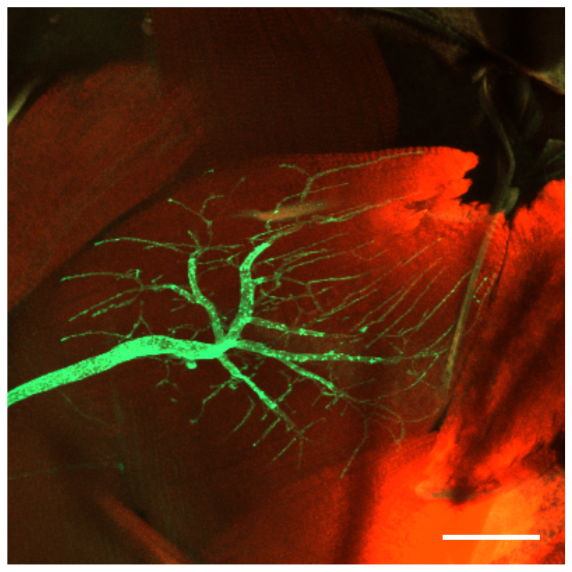

In [266]:
fig = figure(figsize = (10,10))
def apply_gain(img,gain = 1.5,gamma = 1.2):
    img = img**gamma
    img = ((255*(img/np.max(img)))*gain)
    img[img>255] = 255
    img[img<0] = 0
    img = img.astype(uint8)
    return img

scale_length = 50
scale_pxls = float(scale_length) /x_res

gimg = apply_gain(gfp_img,gain = 1.2,gamma= 1.2)
gimg2 = apply_gain(gfp_img,gain = 0.5,gamma= 1.2)
mimg = apply_gain(muscle_img,gain = 2.2,gamma= 1.1)
mimg2 = apply_gain(muscle_img,gain =0.3,gamma= 1.1)
from scipy import ndimage
import scipy
ch1 = mimg
ch2 = gimg.astype(float)+mimg2.astype(float);ch2[ch2>255] = 255;ch2[ch2<0] = 0;ch2 = ch2.astype(uint8)
ch3 = gimg2

img = np.dstack([ch1,ch2,ch3])
#img = ndimage.zoom(img,(6,6,1))
#normimg_gfp = ((255*(gimg/np.max(gimg).astype(float)))*1.0).astype(uint8)
#cmg = colorized_image(normimg,color_map = cm.Reds,alpha = 1.0)
#img = scipy.misc.imresize(img,500,interp = 'bicubic')
#imshow(np.dstack([mimg,gimg,gimg2]),
#       interpolation='bicubic')
#imsave('img.jpg',img)
imshow(img)
b,r,clrs = shape(img)
plot([r-20,r-20-scale_pxls],[b-20,b-20],lw = 5,color= 'w')
gca().set_xbound(0,r)
gca().set_ybound(0,b)
kill_spines()
savefig('b2_innervation.pdf')